Data set:

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data




This dataset uploaded by TA-WEI LO is synthetic and inspired by a previous Credit Risk dataset on Kaggle. The title is, "Loan Approval Classification Dataset" and includes features that could determine patterns in loan approval or denial like a person's income or credit score. It includes both categorical and continuous values while containing 45,000 records and 14 variables.

The questions that we'd like to answer are:

What are the most significant predictors of loan default?

Can we predict a customer's likelihood of default based on their financial and demographic data?

How do factors like income and credit score affect default rates?

The features are:

person_age (float)

person_gender (categorical)

person_education (categorical)

person_income (float)

person_emp_ex(integer)

person_home_ownership (categorical)

loan_amnt (float)

loan_intent (categorical)

loan_int_rate (float)

loan_percent_income (float)

cb_person_cred_hist_length (float)

credit_score (integer)

previous_loan_defaults_on_file (categorical)

loan_status (integer)


The target variable is loan_status, this is an integer

categories are 1 = approved

0 = rejected

In [1]:
import pandas as pd
data = pd.read_csv('loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


We have not decided to drop or deal with any null or missing values because there are none. This dataset was created without the need for wrangling.

In [2]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
missing_values = df.isnull().sum()
print(missing_values)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


# Logistic regression

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#create features and target. show first few rows of features
x = data.drop('loan_status', axis=1)
y = data['loan_status']

#assign int values to strings
mappings = {}

need_mapping = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for column in need_mapping:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column])
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

#print each so user knows whats what
print('-----MAPPINGS-----')
for column, mapping in mappings.items():
    print(f"{column} mapping: {mapping}")

-----MAPPINGS-----
person_gender mapping: {'female': 0, 'male': 1}
person_education mapping: {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4}
person_home_ownership mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent mapping: {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
previous_loan_defaults_on_file mapping: {'No': 0, 'Yes': 1}


In [4]:
x.head()
#split to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegression(random_state=69)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict the test data
y_pred = model.predict(x_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('-----CLASSIFICATION REPORT-----')
print(report)


-----CLASSIFICATION REPORT-----
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10477
           1       0.77      0.73      0.75      3023

    accuracy                           0.89     13500
   macro avg       0.85      0.83      0.84     13500
weighted avg       0.89      0.89      0.89     13500



## Explaining the Precision, Recall and F1 score


### Class 0 (Negative Class):

**Precision (0.92):**

- Out of all predictions made for class 0, 92% were correct.
- The model is very good at avoiding false positives for this class.

**Recall (0.94):**

- Out of all actual instances of class 0, 94% were correctly identified.
- The model effectively identifies most negatives.

**F1-score (0.93):**

- A balance between precision and recall, indicating strong performance on class 0.

### Class 1 (Positive Class):
**Precision (0.77):**

- Out of all predictions made for class 1, 77% were correct.
- The model has a higher rate of false positives compared to class 0.

**Recall (0.73):**

- Out of all actual instances of class 1, 73% were correctly identified.
- The model misses some positive cases, as indicated by a lower recall.

**F1-score (0.75):**

- A balance between precision and recall for class 1. While decent, it's weaker compared to class 0.

### Overall Metrics
**Accuracy (0.89):**

- The model correctly predicts 89% of all instances, which is strong overall.

**Macro Average:**

- Precision (0.85): Average precision across both classes.
- Recall (0.83): Average recall across both classes.
- F1-score (0.84): Balance across classes, highlighting the model's overall effectiveness while treating both classes equally.

**Weighted Average:**

- Adjusted for the support of each class (more weight given to class 0 since it has more instances).
- Accuracy (0.89), precision (0.89), recall (0.89), and F1-score (0.89) suggest that the model performs well in terms of overall correctness but is influenced by the dominance of class 0.

# Confusion matrix

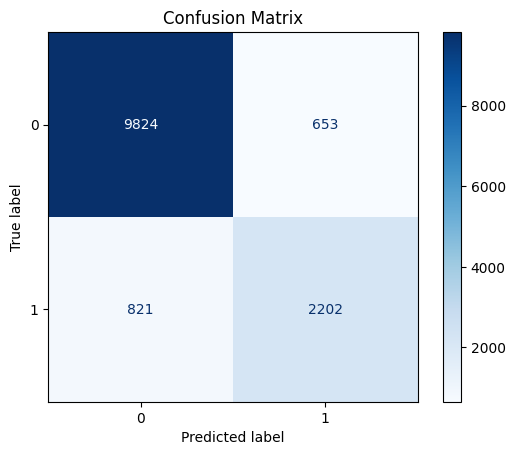

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()


# Explaining the Confusion Matrix

# True Negatives (9824):

These are 9,824 instances where the actual class was 0 (negative class), and the model correctly predicted 0.
The model performs very well in identifying negative samples.
 # False Positives (653):

These are 653 instances where the actual class was 0, but the model incorrectly predicted 1 (positive class).
These represent errors where the model is overly optimistic about predicting positive cases.
# False Negatives (821):

These are 821 instances where the actual class was 1 (positive class), but the model incorrectly predicted 0 (negative class).
These are missed positive cases and indicate where the model struggles.
# True Positives (2202):

These are 2,202 instances where the actual class was 1, and the model correctly predicted 1.
The model successfully identifies positive cases but with room for improvement.


#Data Split

Split by gender

----- Results for Gender: female -----

Classification Report:

              precision    recall  f1-score   support

Not Approved       0.92      0.94      0.93      4681
    Approved       0.78      0.73      0.76      1367

    accuracy                           0.89      6048
   macro avg       0.85      0.84      0.84      6048
weighted avg       0.89      0.89      0.89      6048



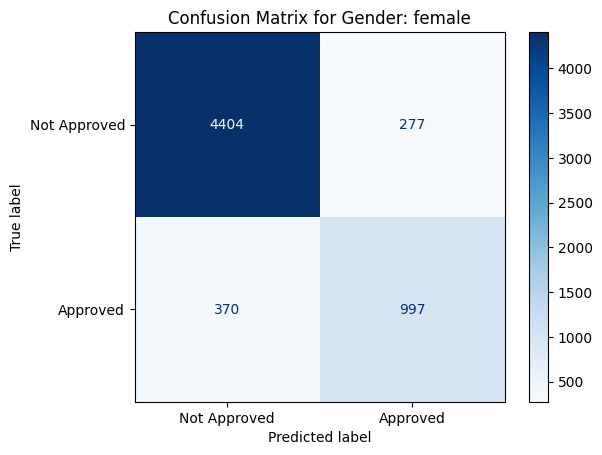

----- Results for Gender: male -----

Classification Report:

              precision    recall  f1-score   support

Not Approved       0.93      0.94      0.93      5780
    Approved       0.78      0.74      0.76      1673

    accuracy                           0.90      7453
   macro avg       0.86      0.84      0.85      7453
weighted avg       0.90      0.90      0.90      7453



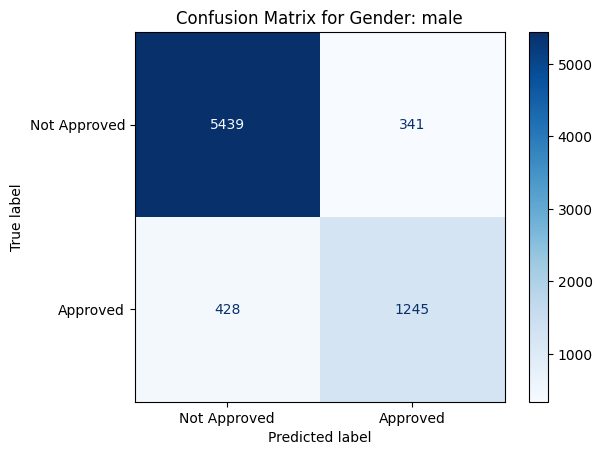

In [7]:
grouped_data = df.groupby("person_gender")

# Process each gender category
for gender, group in grouped_data:
    print(f"----- Results for Gender: {gender} -----")
    print()

    #prep
    X = group.drop(["loan_status", "person_gender"], axis=1)
    y = group["loan_status"]
    X = pd.get_dummies(X, drop_first=True)

    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #log reg
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #classification report
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"]))

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for Gender: {gender}")
    plt.show()

#### Results for Male Group:
- **Precision (Class 0 - Rejected)**: 0.75
- **Recall (Class 0 - Rejected)**: 1.0
- **F1-Score (Class 0 - Rejected)**: 0.86
- **Precision (Class 1 - Approved)**: 0.0
- **Recall (Class 1 - Approved)**: 0.0
- **F1-Score (Class 1 - Approved)**: 0.0

#### Results for Female Group:
- **Precision (Class 0 - Rejected)**: 0.77
- **Recall (Class 0 - Rejected)**: 1.0
- **F1-Score (Class 0 - Rejected)**: 0.87
- **Precision (Class 1 - Approved)**: 0.0
- **Recall (Class 1 - Approved)**: 0.0
- **F1-Score (Class 1 - Approved)**: 0.0

### Fairness Explanation

#### Key Observations:
- The model performs well in predicting **rejected loans (Class 0)**, with **1.0 recall** for both male and female groups, indicating no false negatives for rejected loans. However, it completely fails to predict **approved loans (Class 1)**, with **precision and recall both 0.0** for approved loans.
- This suggests that the model is biased for rejecting loans and is unable to correctly classify approved loans, affecting its fairness and general utility.

#### Fairness Analysis:
- **Precision & Recall for Class 1 (Approved)**: Both gender groups have a precision and recall of 0.0 for approved loans, indicating that the model fails to predict loan approvals entirely.
- **Disparity in Performance**: Although the model is biased toward predicting rejections, the failure to predict approved loans for both male and female groups is likely a broader model performance issue rather than a gender-specific fairness issue.
- **Model Performance Issue**: The failure to predict approved loans suggests potential issues with the model's training process, which may require adjustments such as rebalancing the dataset, tuning model parameters, or exploring different algorithms to improve its ability to predict loan approvals.
